<a href="https://colab.research.google.com/github/jcjcchang/2nd-ML100Days/blob/master/homework/Day_042_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [0]:
from sklearn import datasets, metrics
import pandas as pd
# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [0]:
dt = datasets.load_wine()
dt_x = dt.data
dt_y = dt.target

In [6]:
dt['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
df = pd.DataFrame(dt.data,columns = dt['feature_names'])
df.head()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dt_x, dt_y, test_size=0.25, random_state=4)

In [40]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test,y_pred)
print("Acuuracy: ", acc)
print(dt.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.8888888888888888
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.         0.01931722 0.         0.         0.04609792 0.
 0.0449625  0.         0.         0.35268695 0.         0.13022458
 0.40671082]


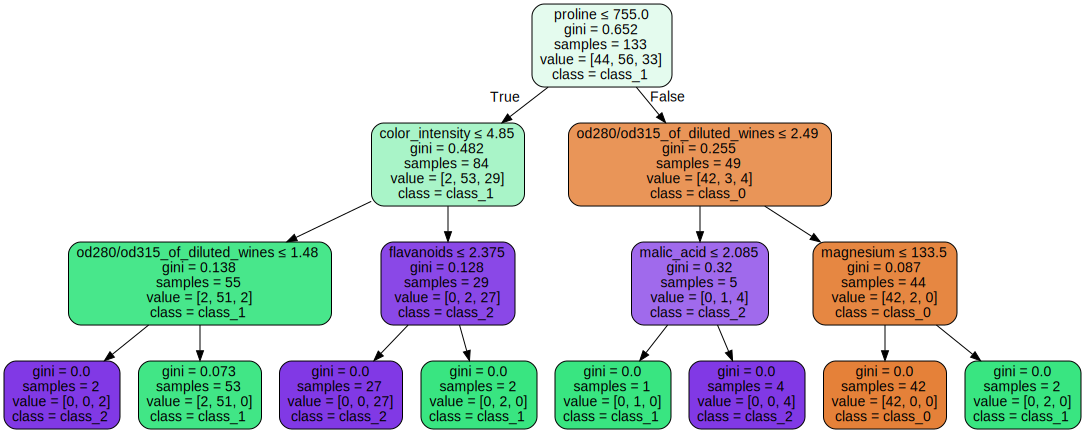

In [41]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("dt") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=dt.feature_names,  
                      class_names=dt.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


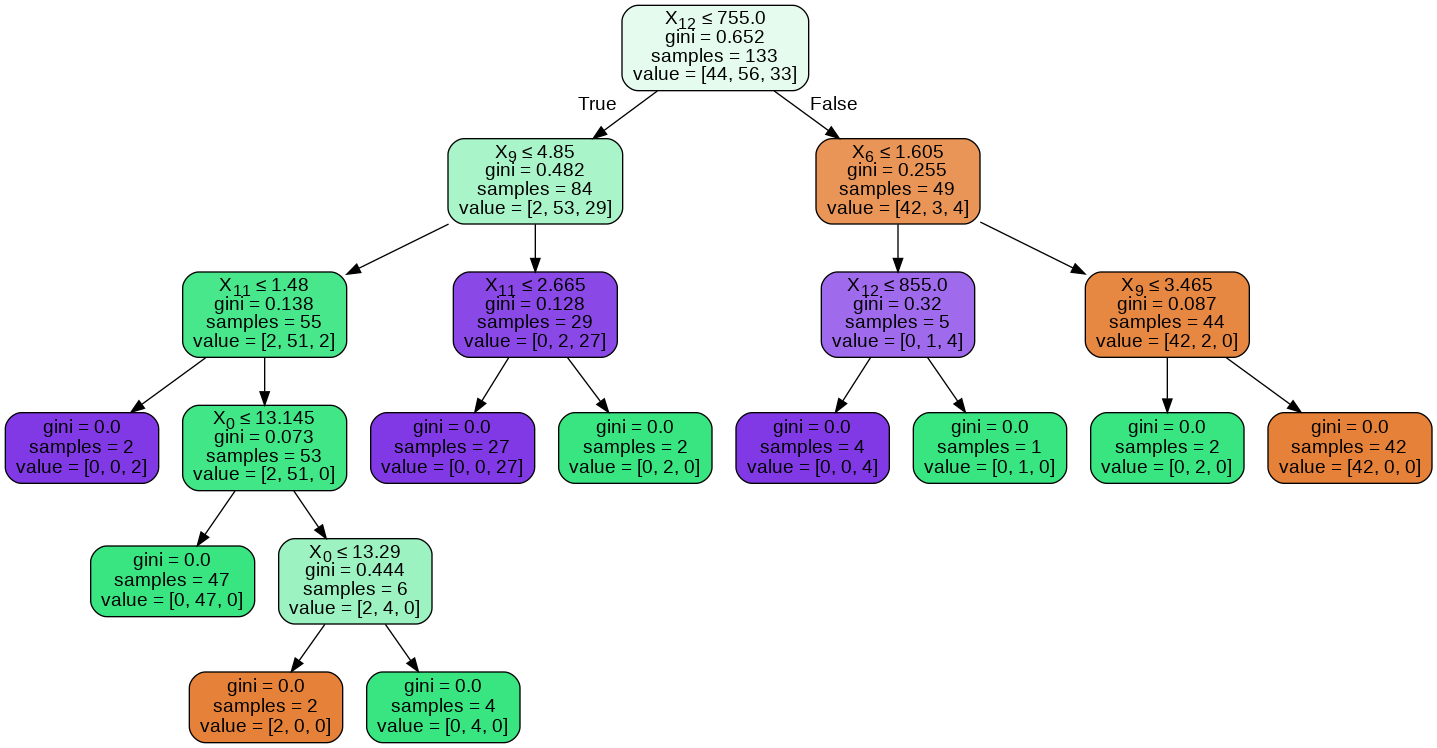

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
dt = datasets.load_boston()
dt_x = dt.data
dt_y = dt.target

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dt_x, dt_y, test_size=0.25, random_state=4)

In [26]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

acc = metrics.r2_score(y_test,y_pred)
print("score: ", acc)
print(dt.feature_names)
print("Feature importance: ", clf.feature_importances_)

score:  0.7455933907878529
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [6.53344985e-02 2.02782765e-03 7.33679781e-03 5.90768759e-05
 3.59127624e-02 5.41649009e-01 1.42784959e-02 6.71465431e-02
 5.89027425e-04 1.23984022e-02 2.10305170e-02 9.71575610e-03
 2.22521286e-01]


'dt.pdf'

AttributeError: ignored

In [30]:
dt.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
dt.target_names

AttributeError: ignored